In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

In [4]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [6]:
df = pd.read_csv(r"C:\Users\ayush\Desktop\DDos.csv")

In [7]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
df.columns= df.columns.str.strip()

In [9]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

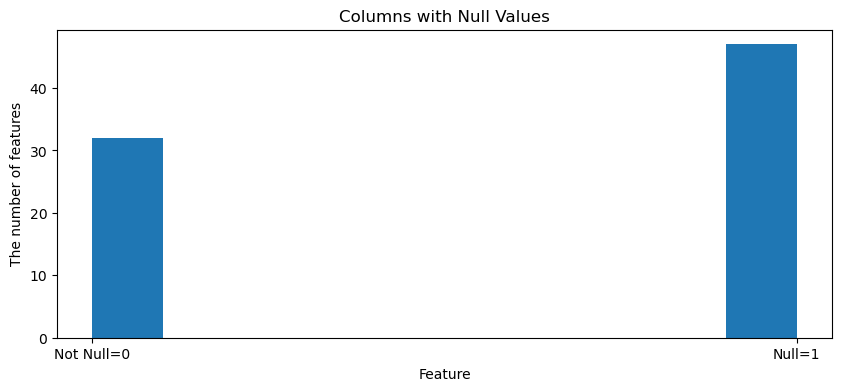

In [10]:
plt.figure(1,figsize=(10,4))
plt.hist(df.isna().sum())
plt.xticks([0,1], labels=['Not Null=0','Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')
plt.show()

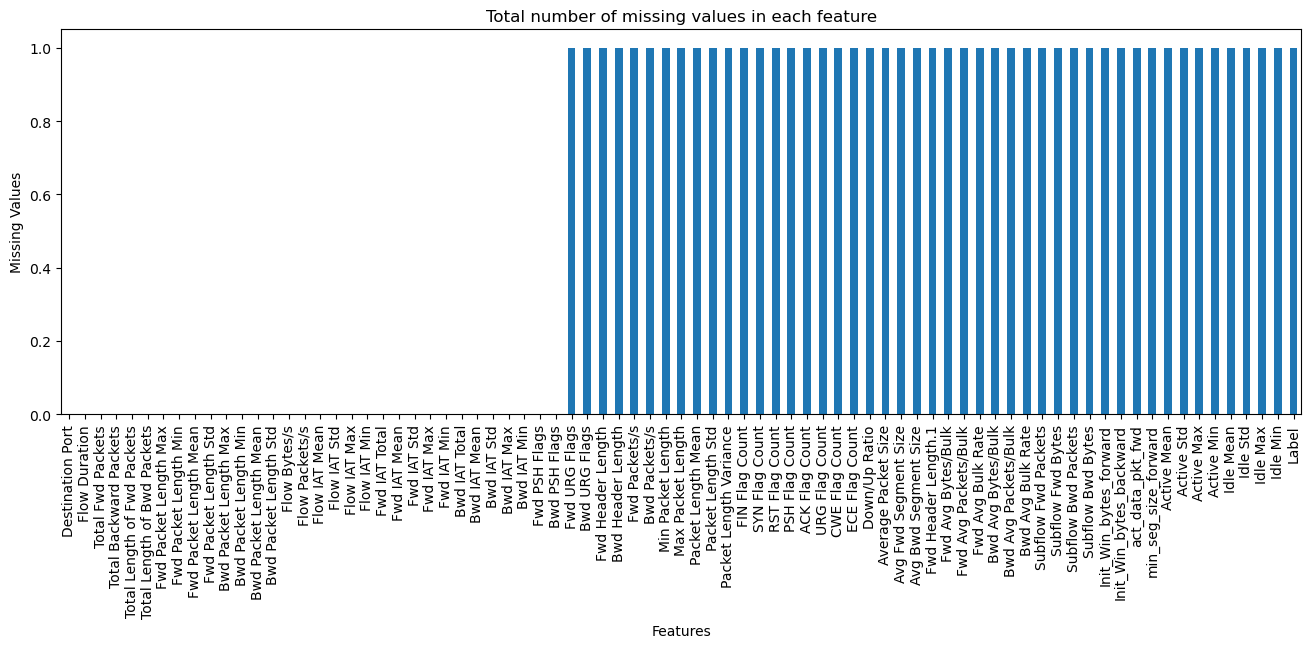

In [11]:
def plotMissingValues(dataframe):
    missing_values= dataframe.isnull().sum()
    fig= plt.figure(figsize=(16,5))
    missing_values.plot(kind='bar')
    plt.xlabel('Features')
    plt.ylabel('Missing Values')
    plt.title('Total number of missing values in each feature')
    plt.show()
plotMissingValues(df)

In [12]:
data_f=df.dropna()

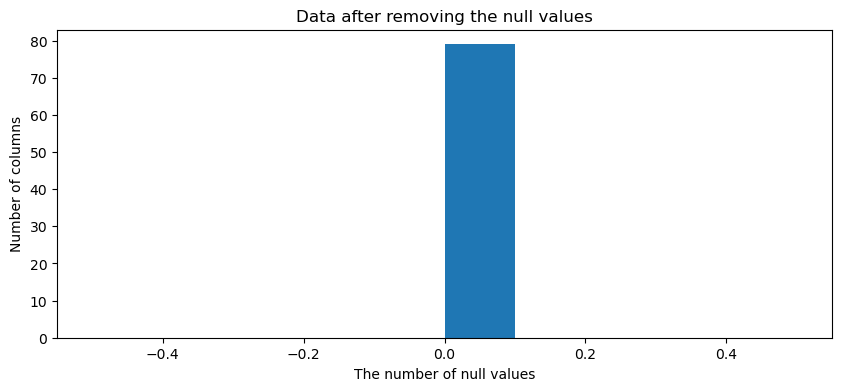

In [13]:
plt.figure(1,figsize=(10,4))
plt.hist(data_f.isna().sum())
plt.title('Data after removing the null values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')
plt.show()

In [14]:
pd.set_option('use_inf_as_na',True)
null_values=data_f.isnull().sum()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19328\2386221882.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na',True)


In [15]:
(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [16]:
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


C:\Users\ayush\AppData\Local\Temp\ipykernel_19328\3062142306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


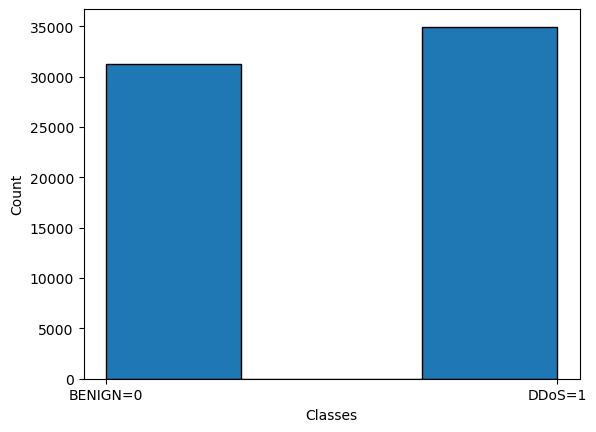

In [17]:
plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [18]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


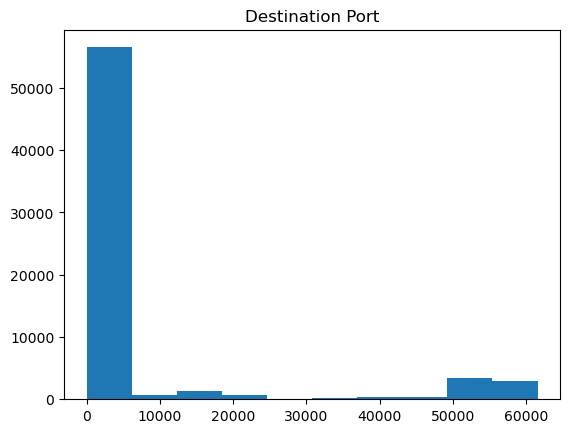

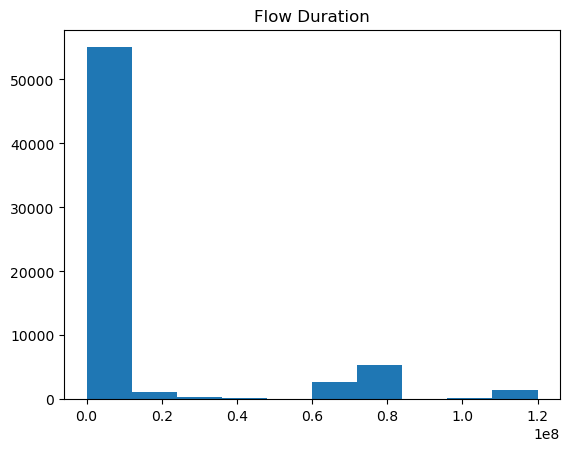

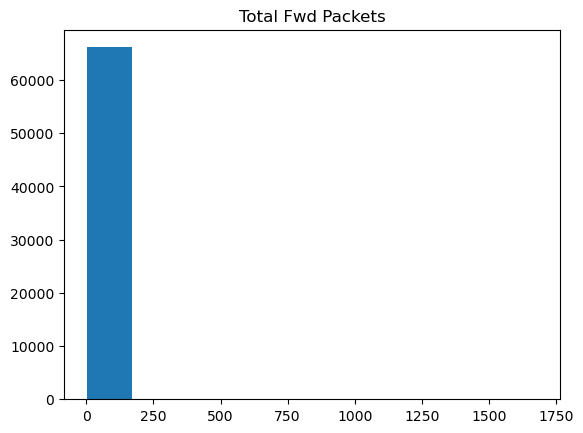

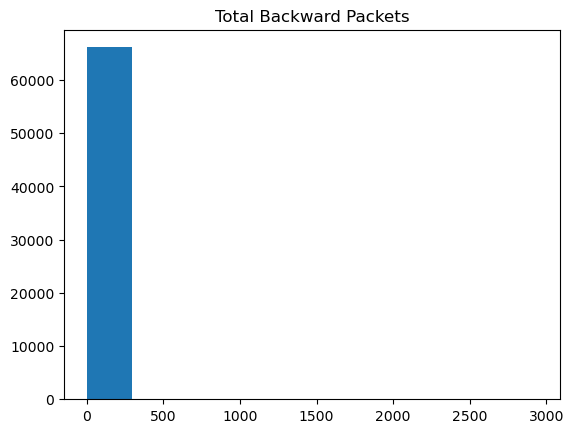

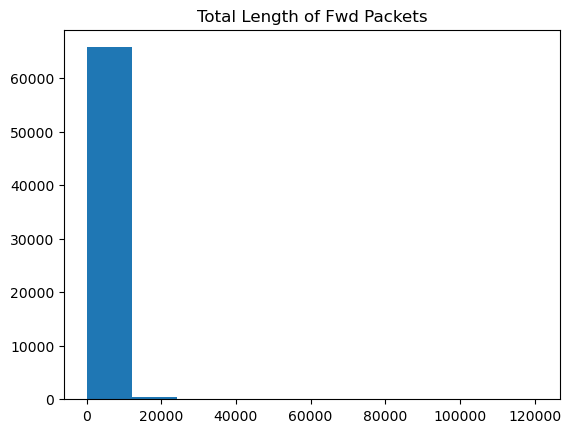

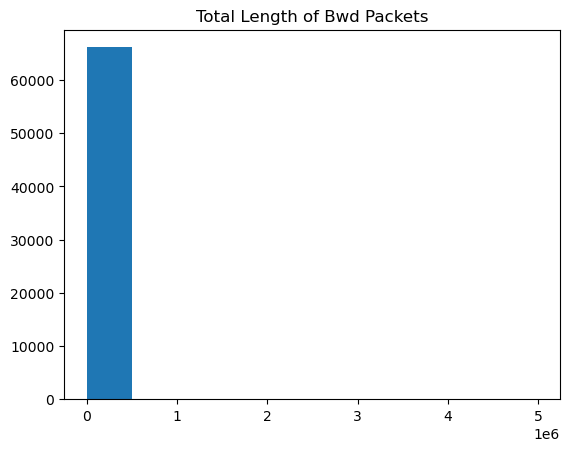

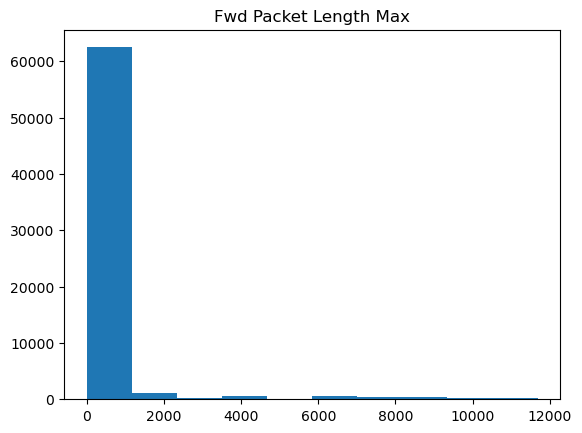

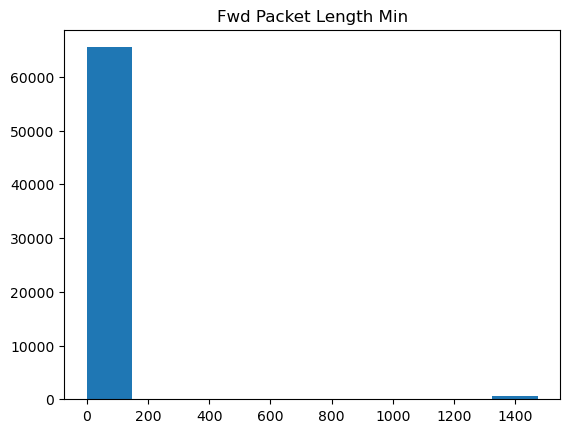

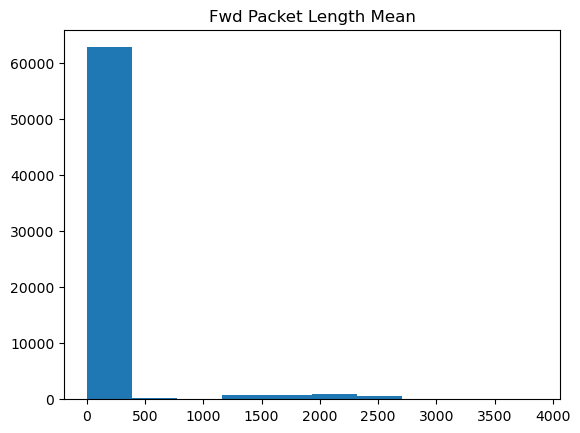

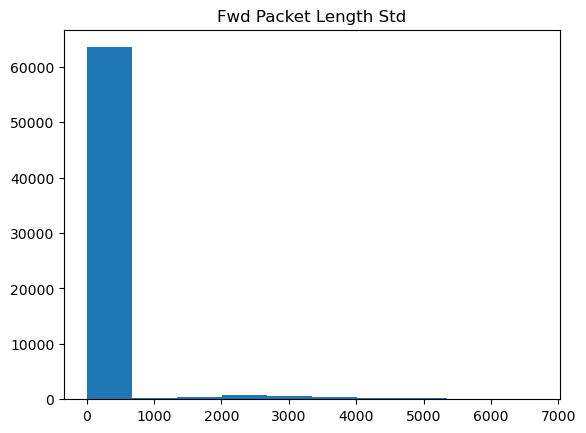

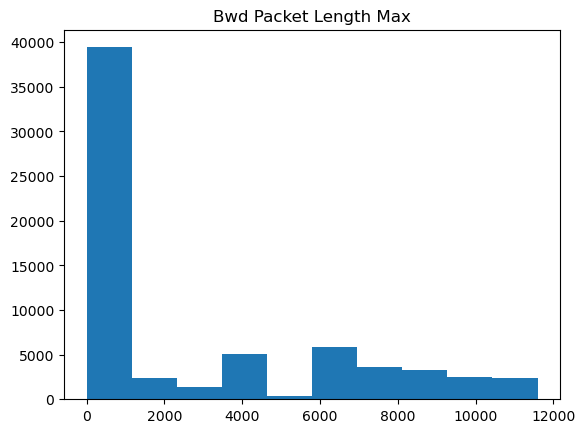

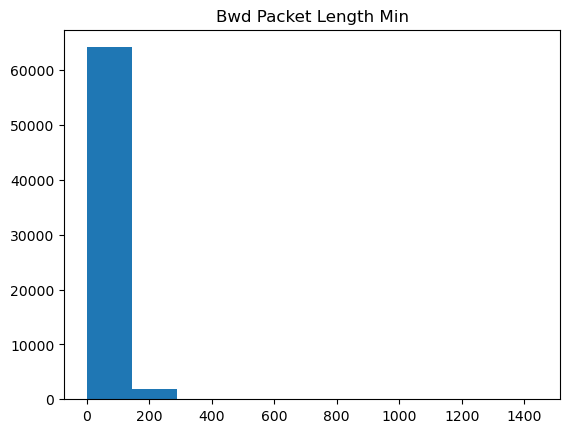

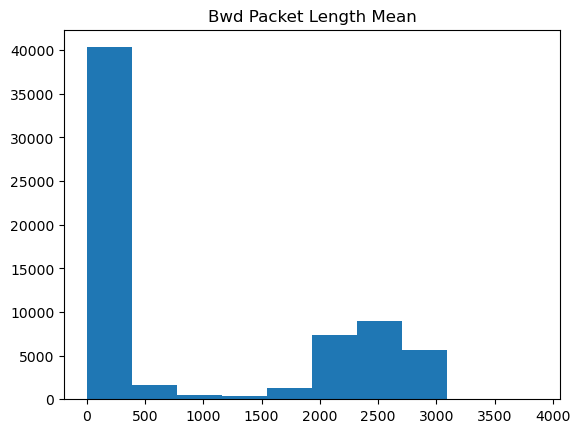

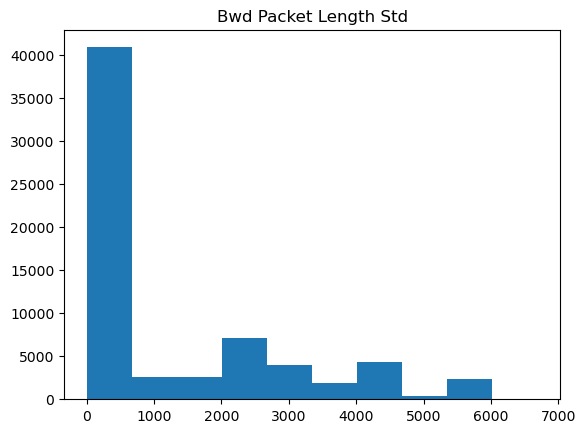

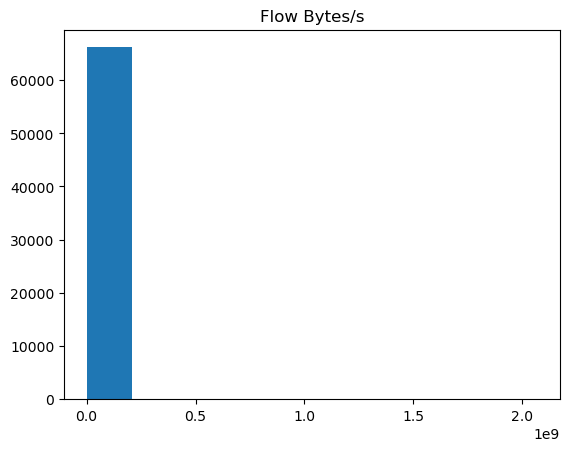

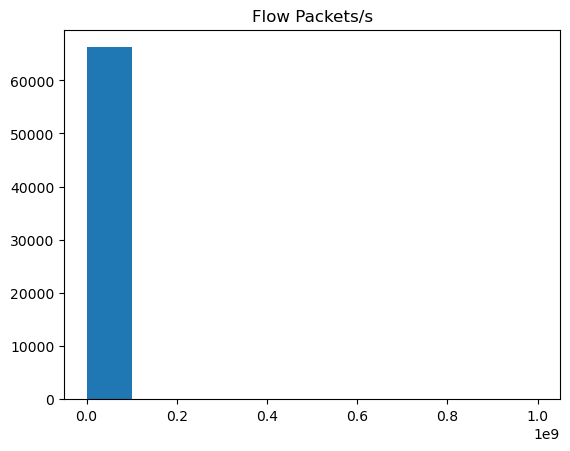

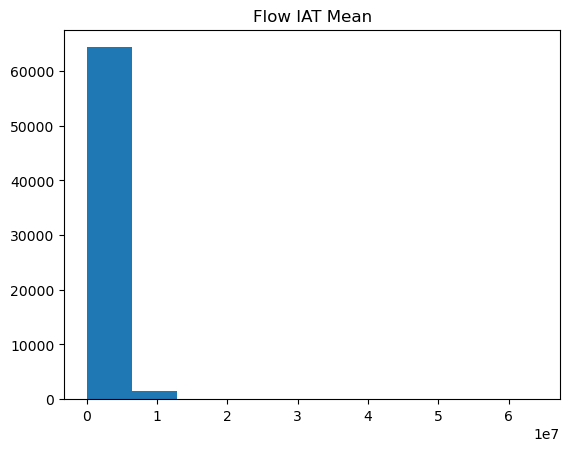

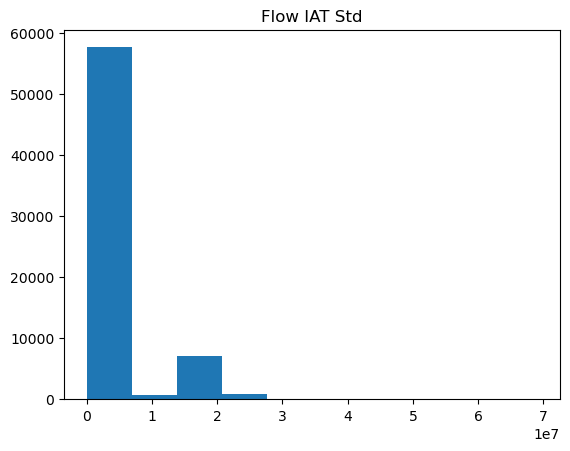

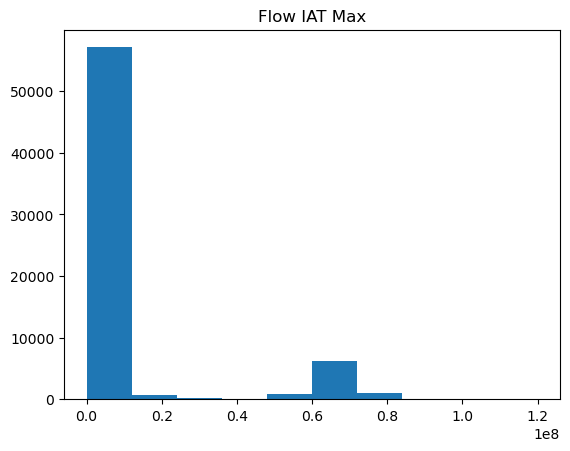

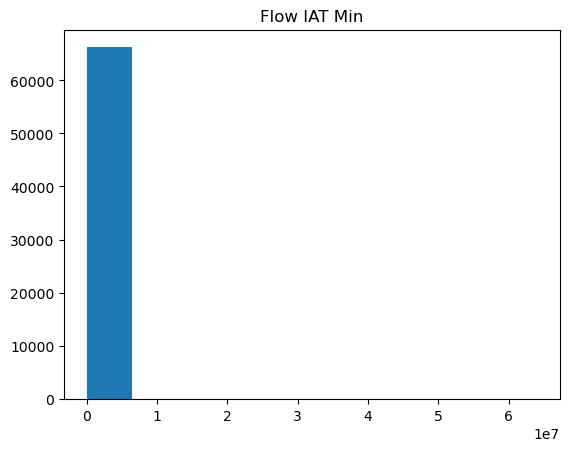

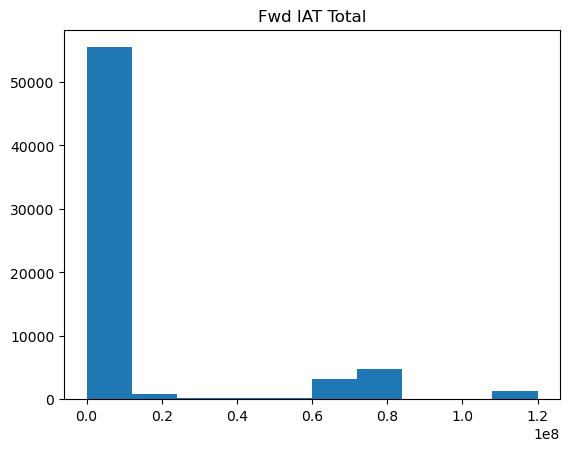

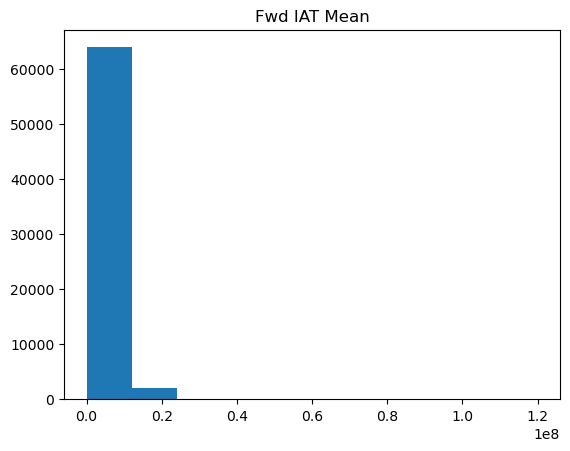

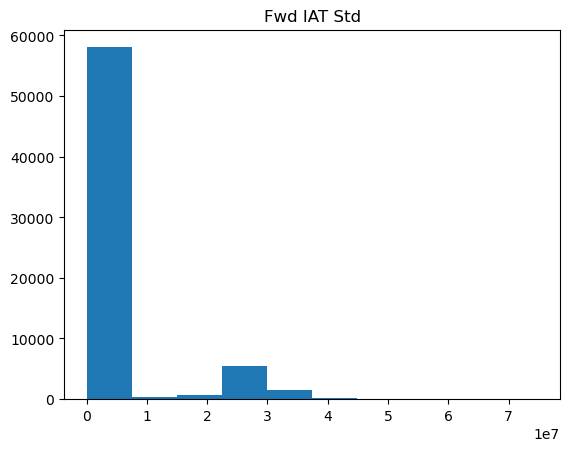

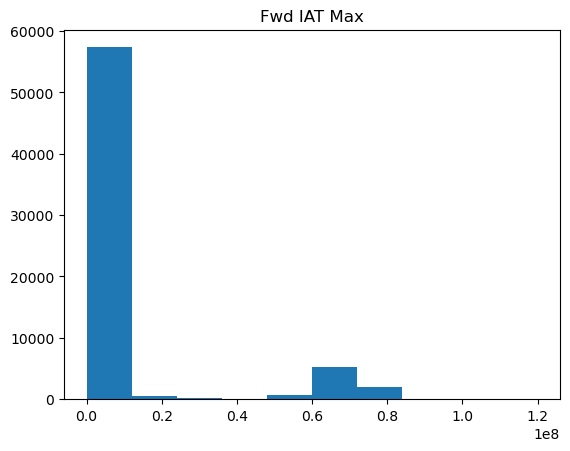

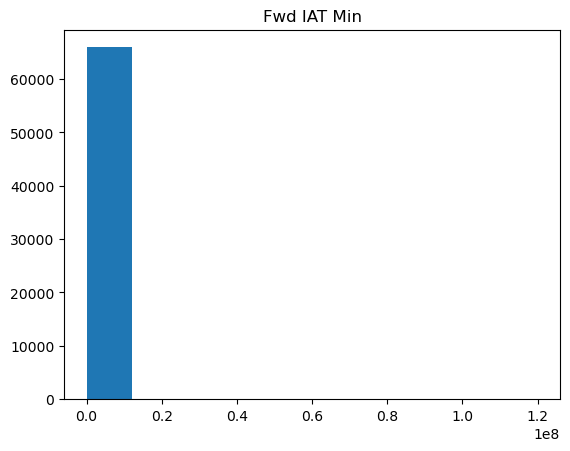

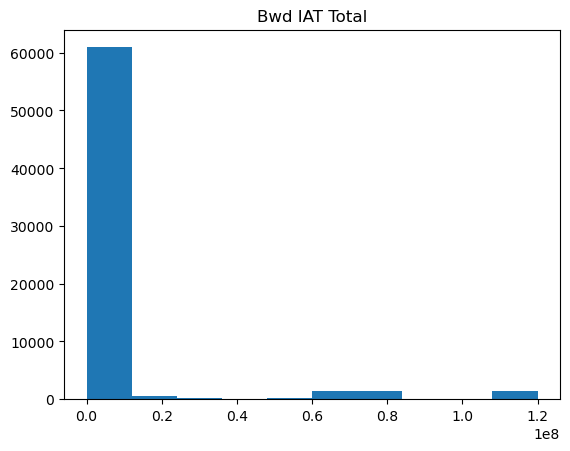

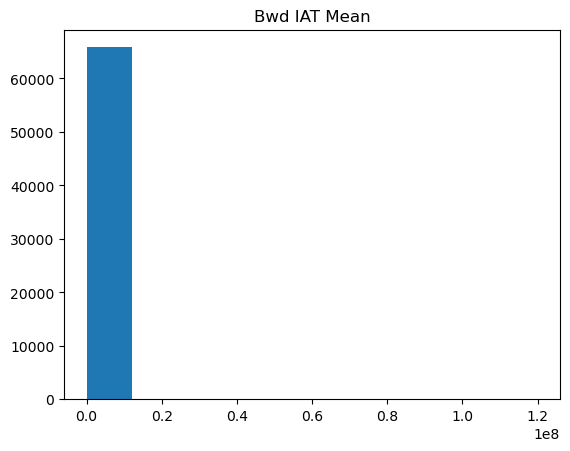

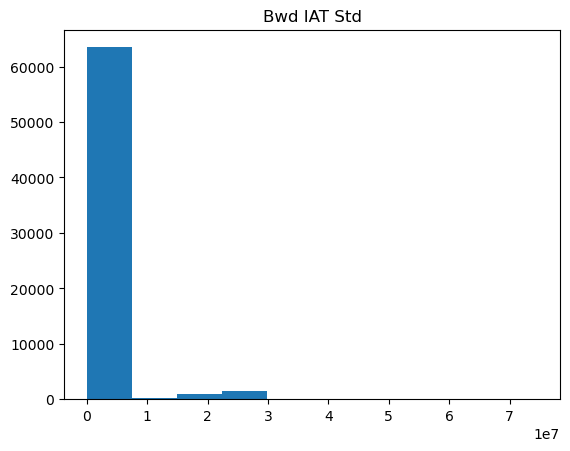

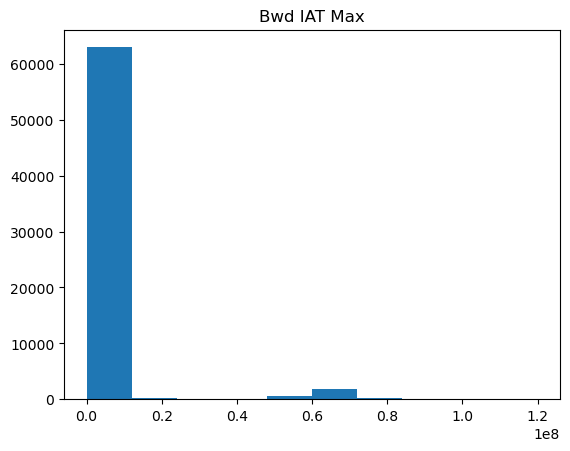

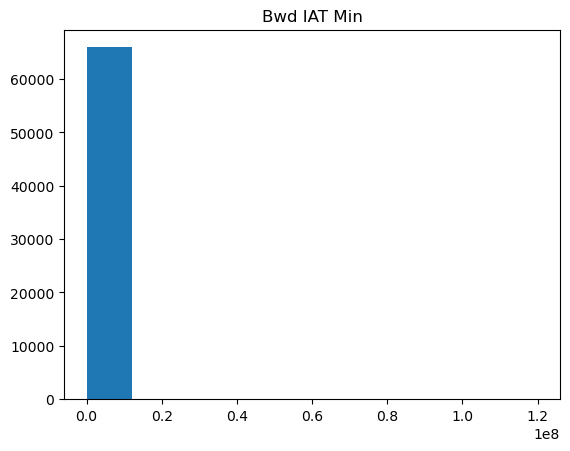

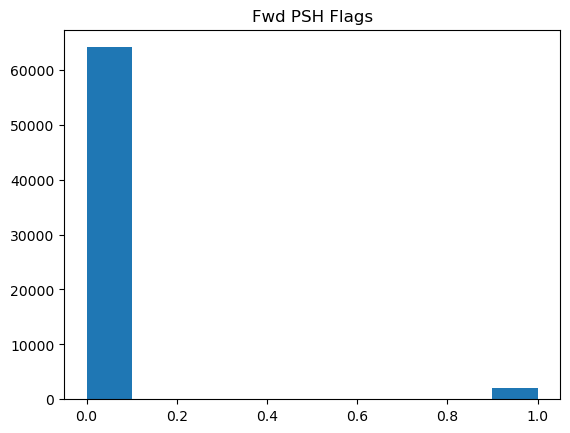

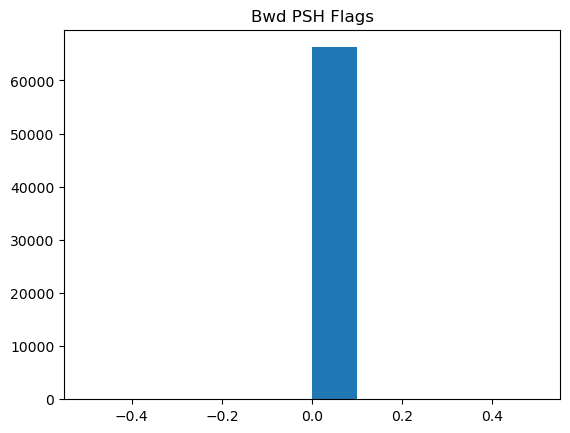

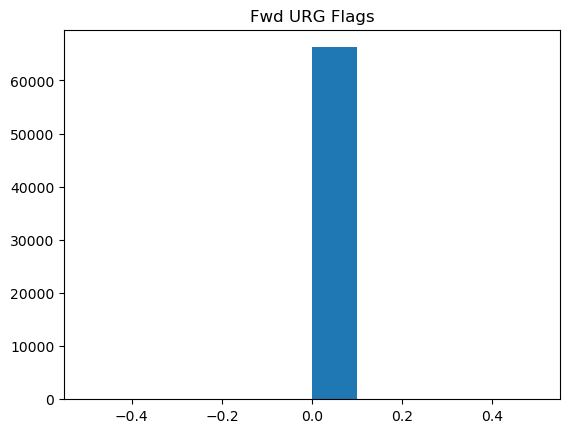

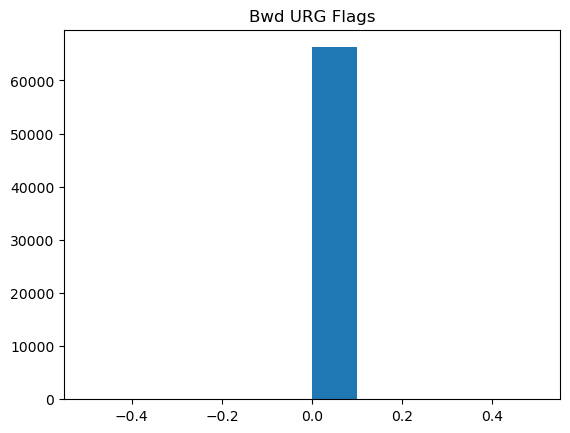

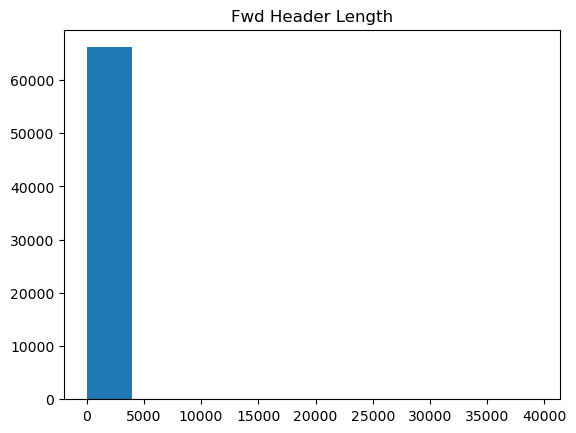

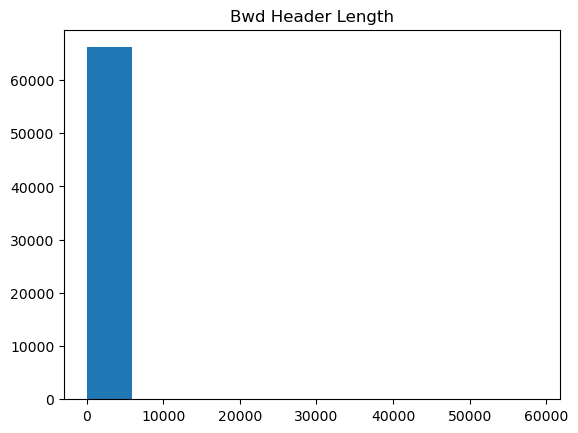

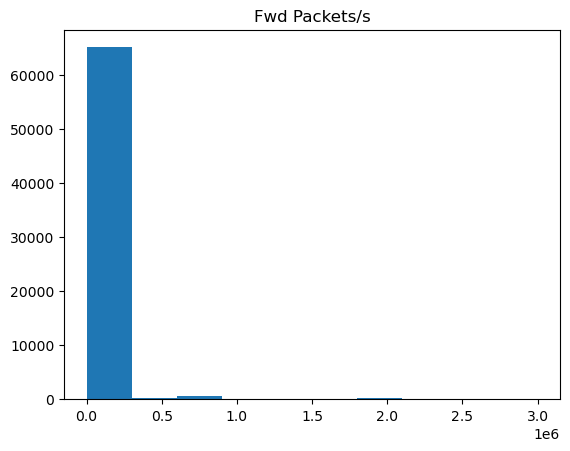

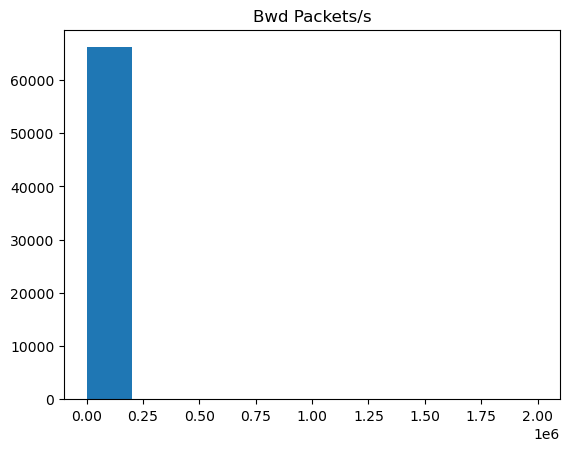

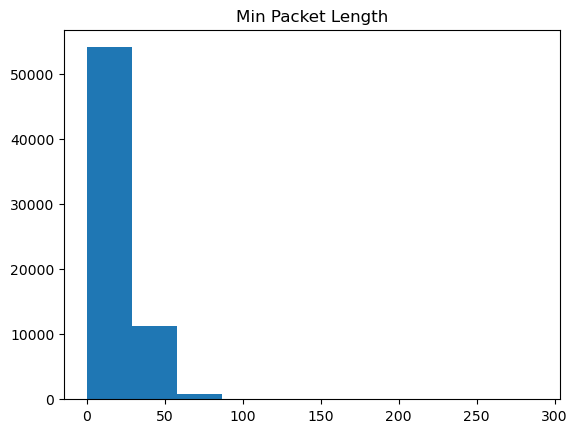

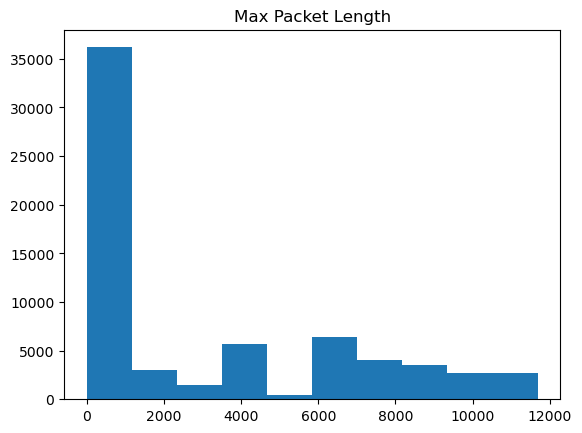

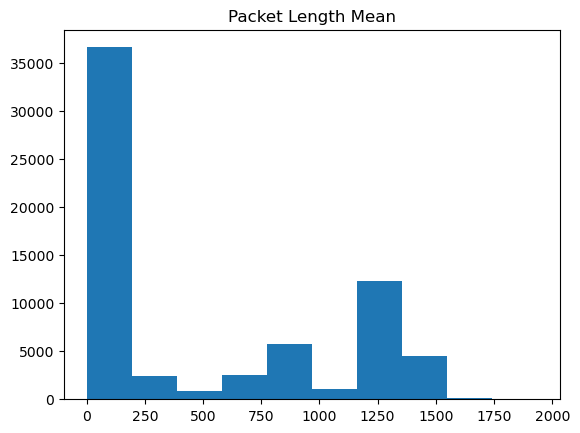

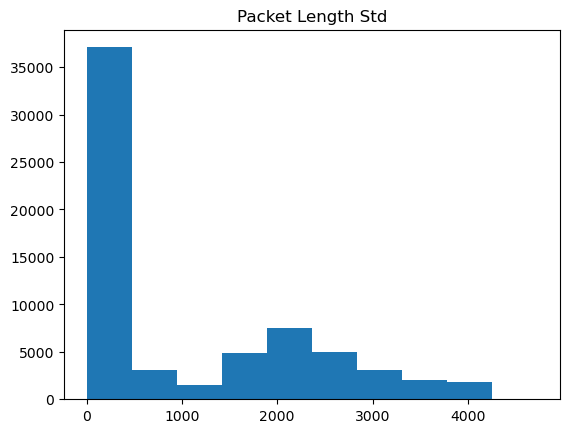

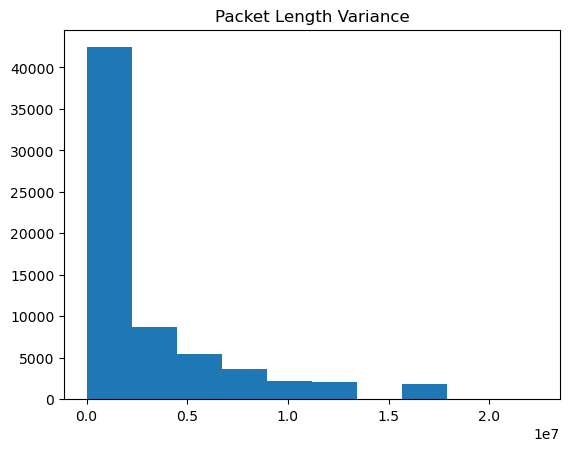

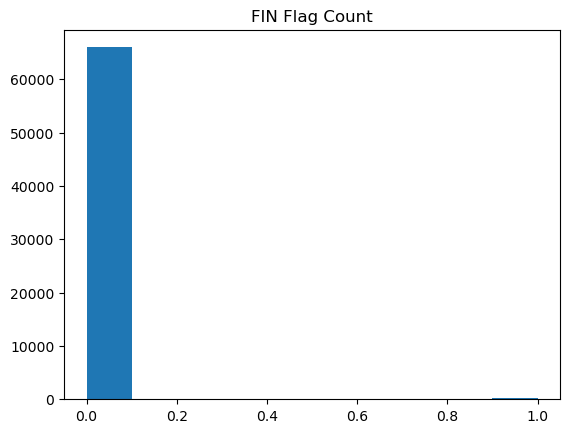

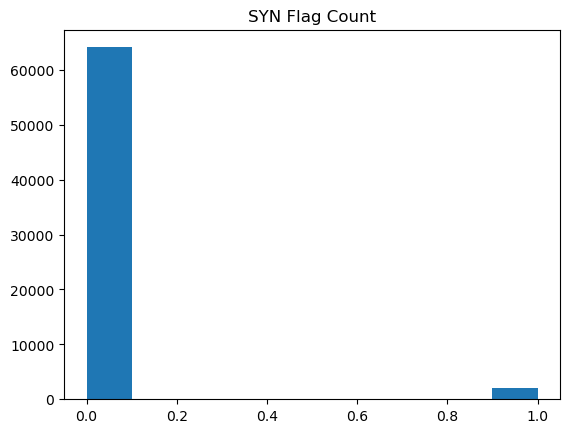

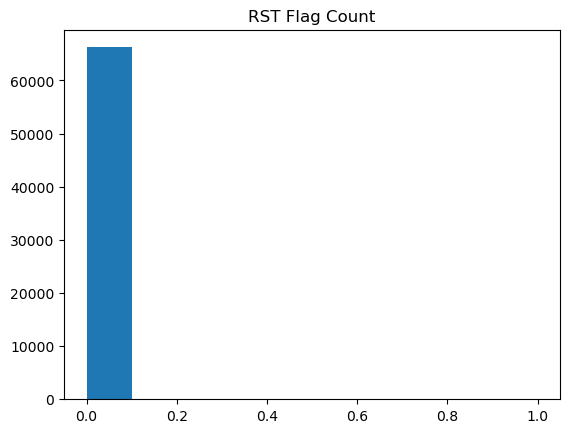

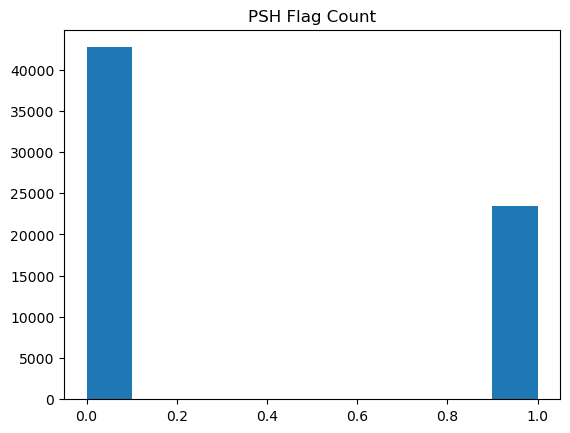

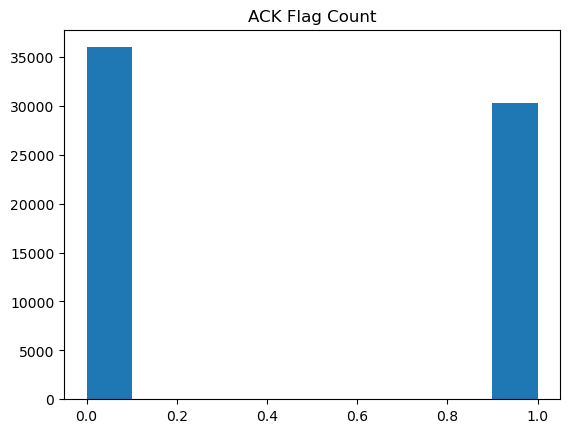

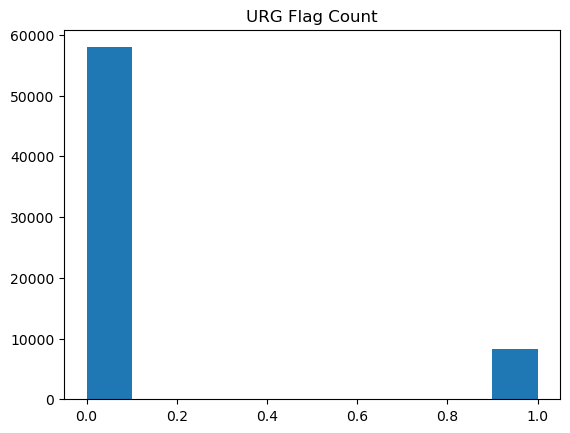

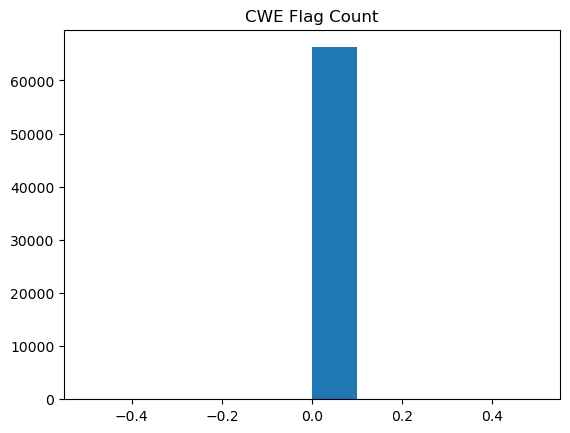

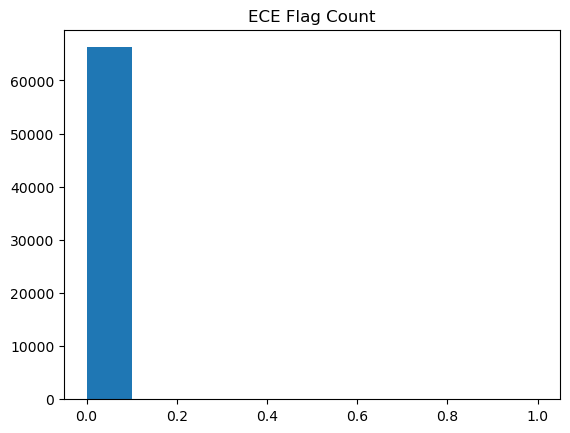

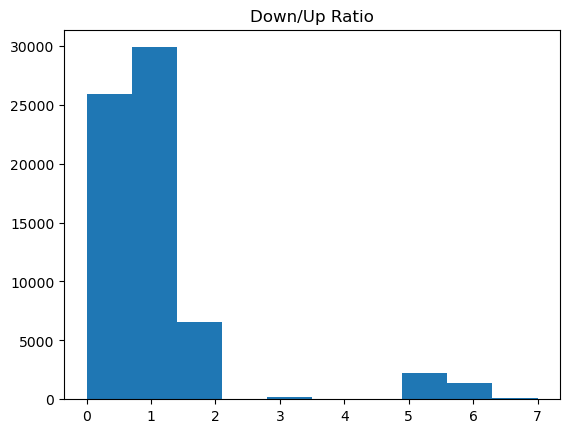

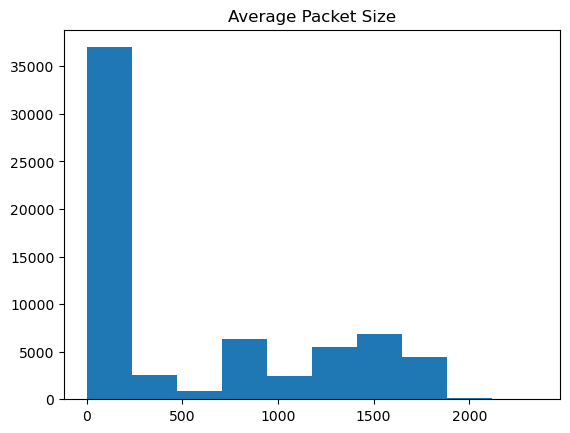

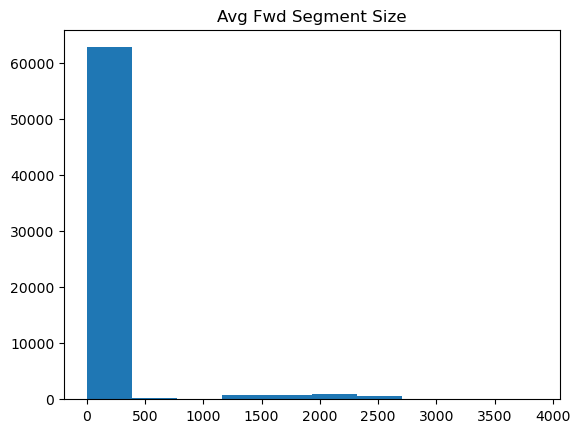

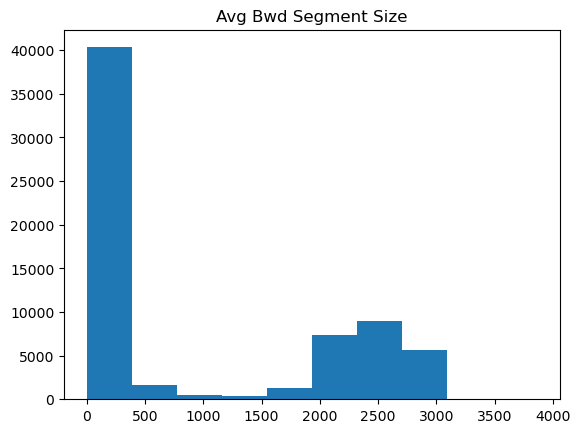

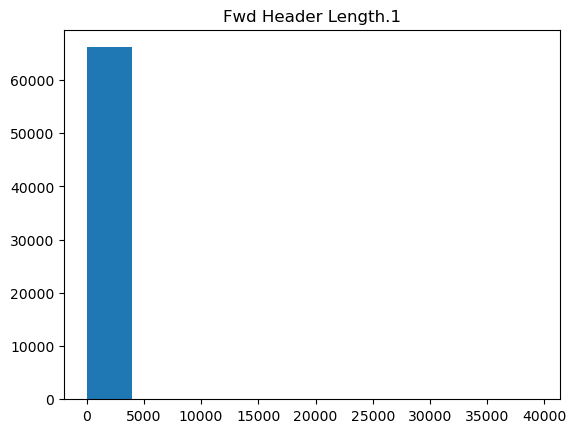

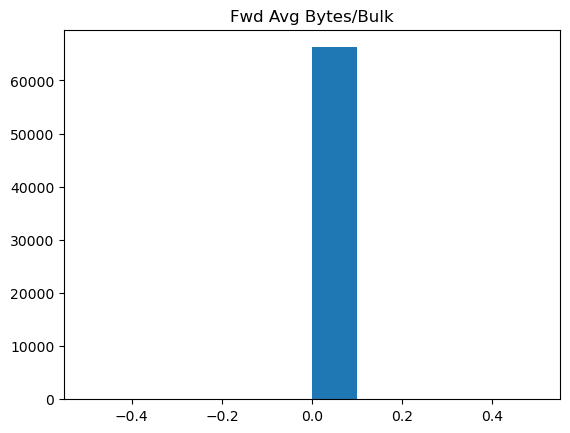

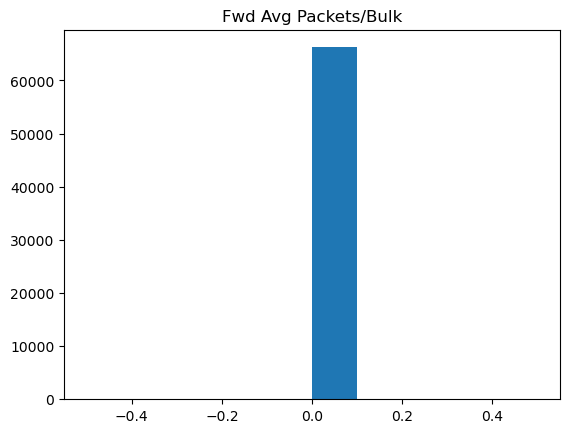

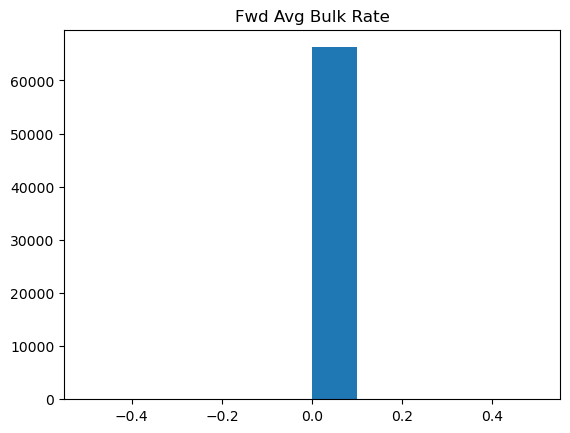

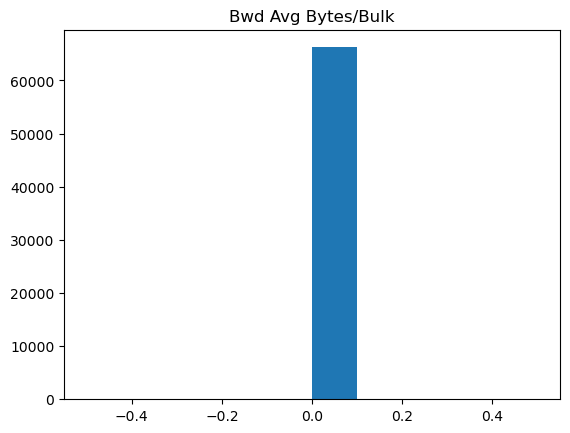

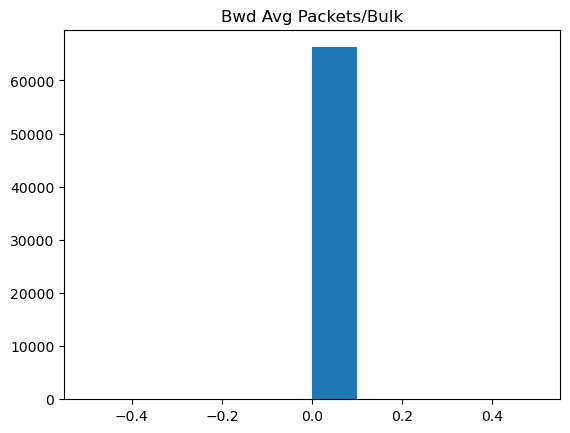

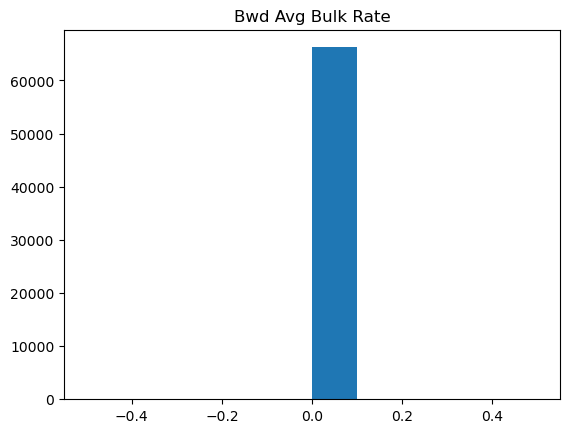

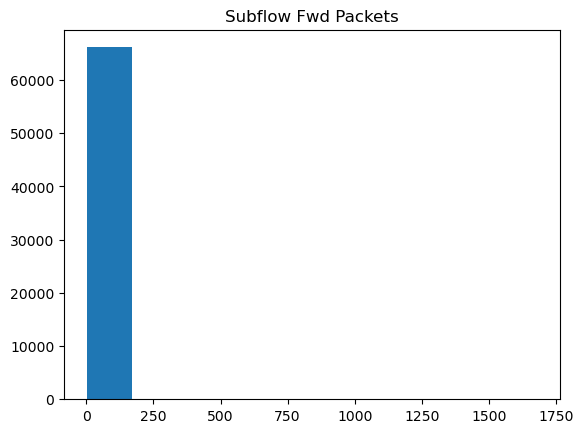

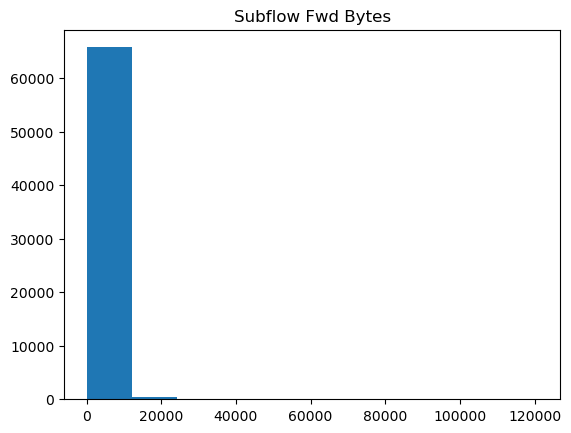

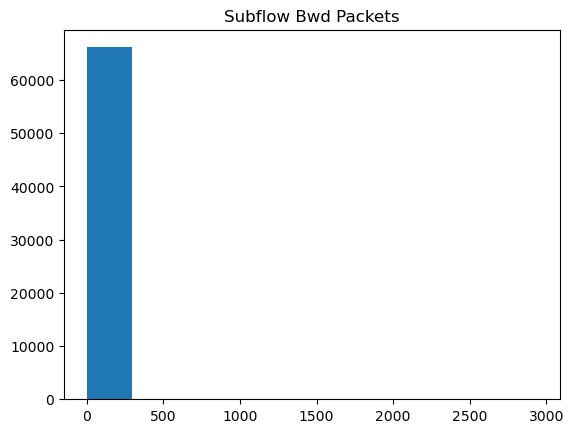

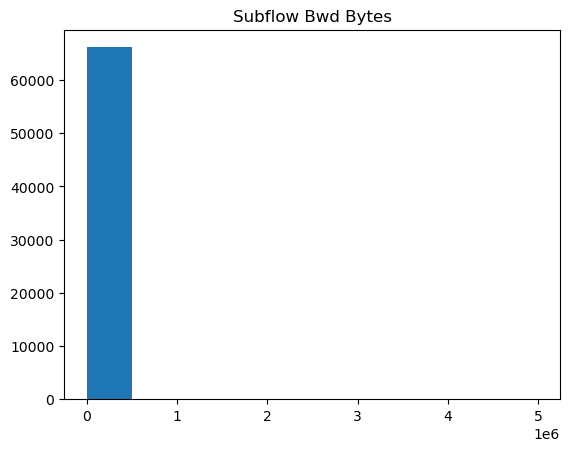

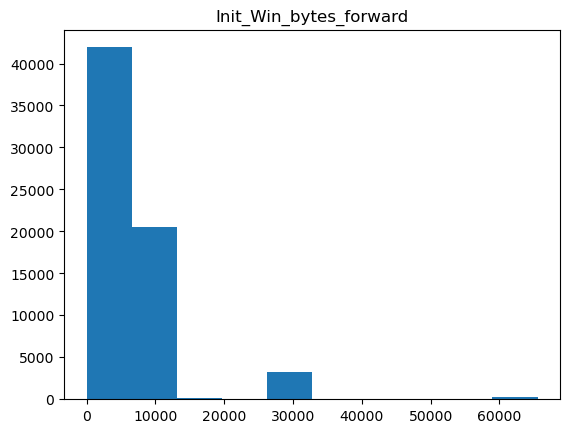

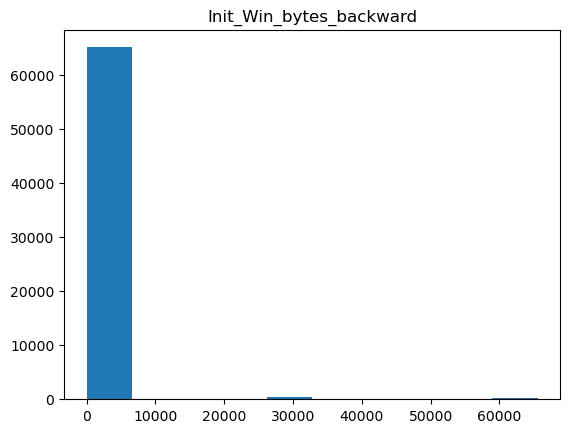

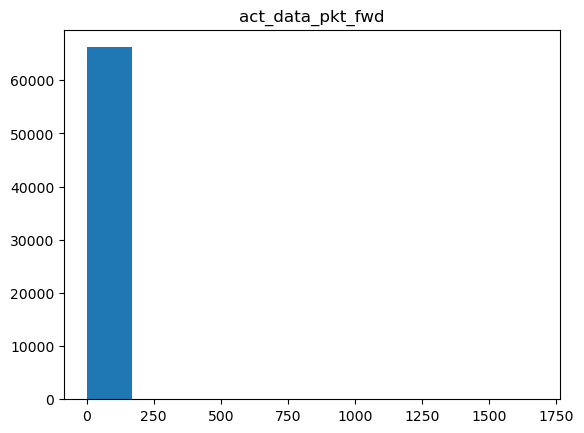

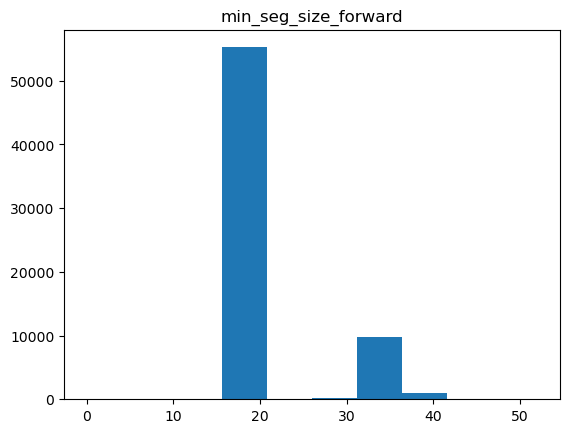

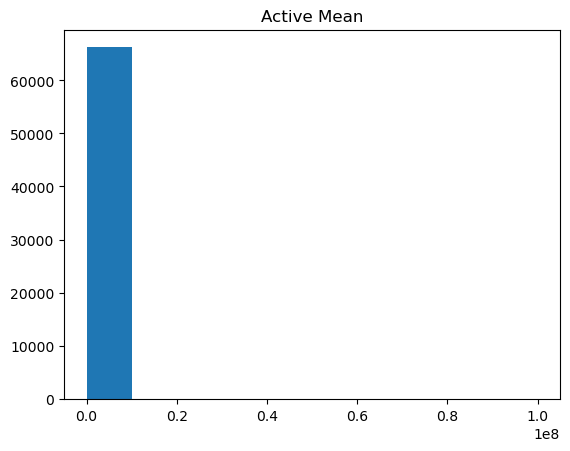

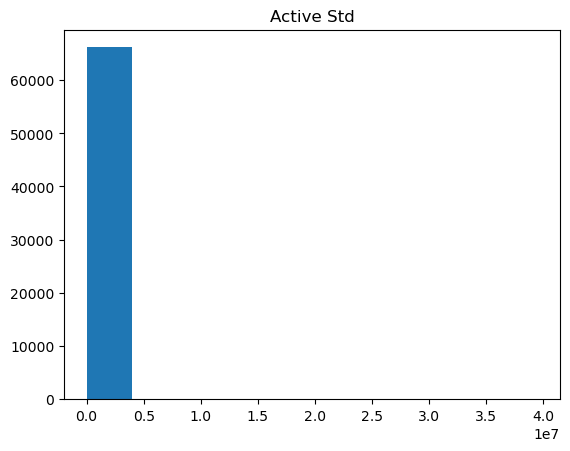

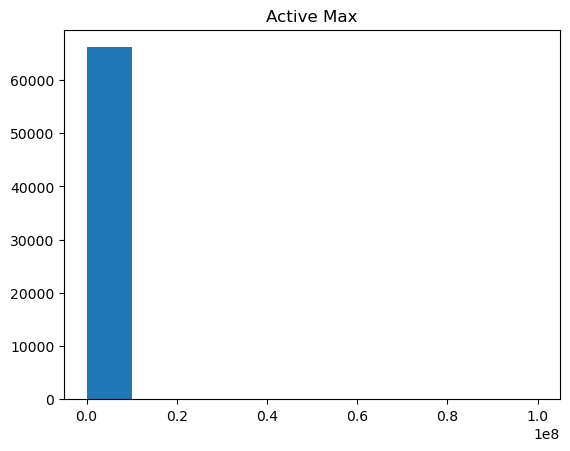

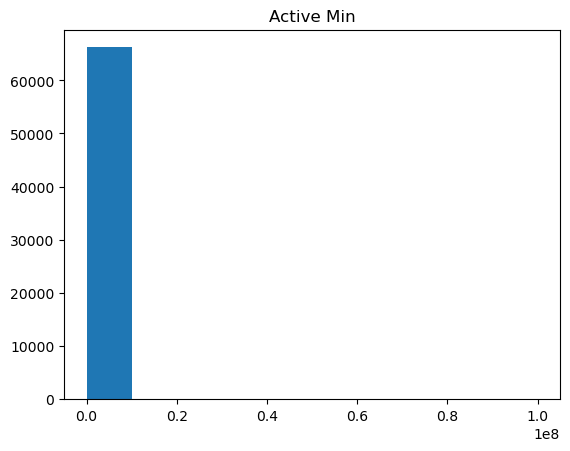

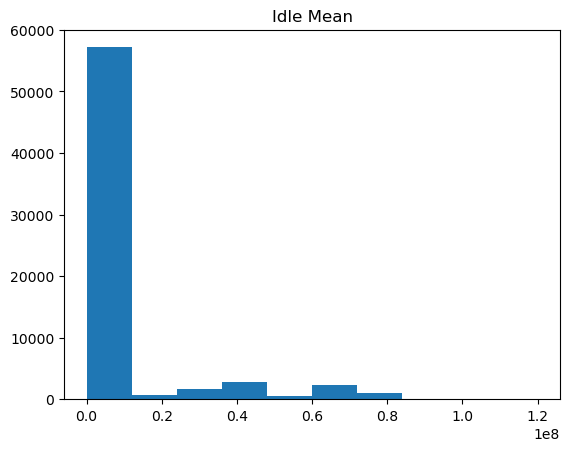

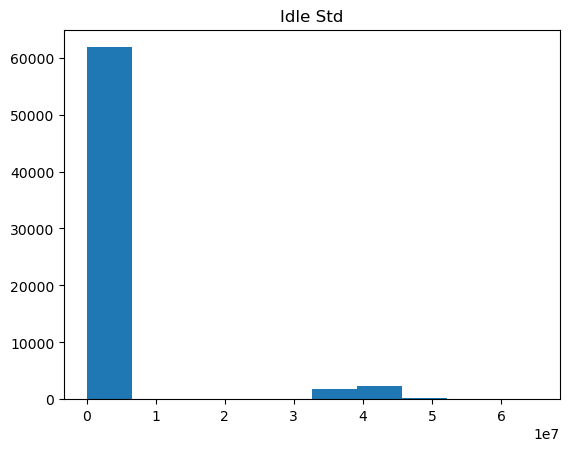

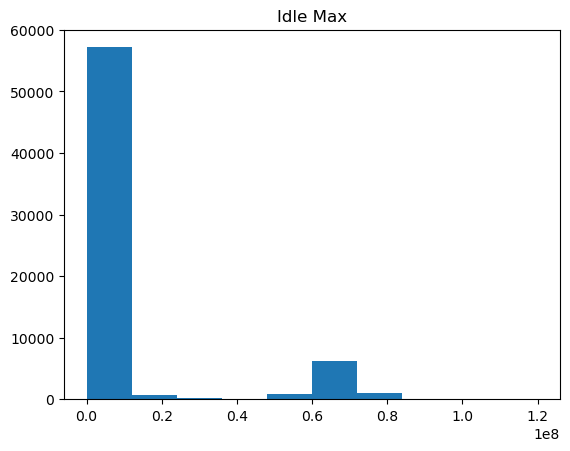

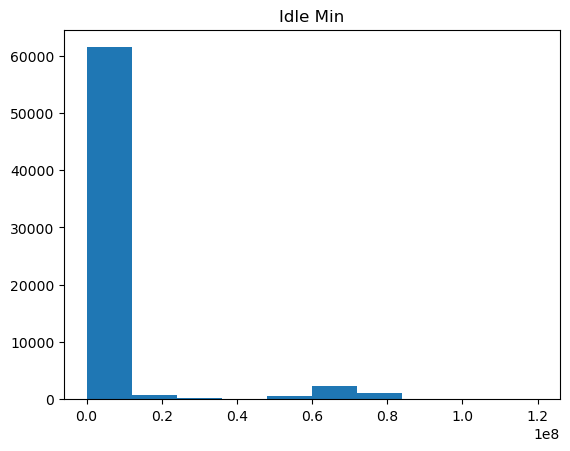

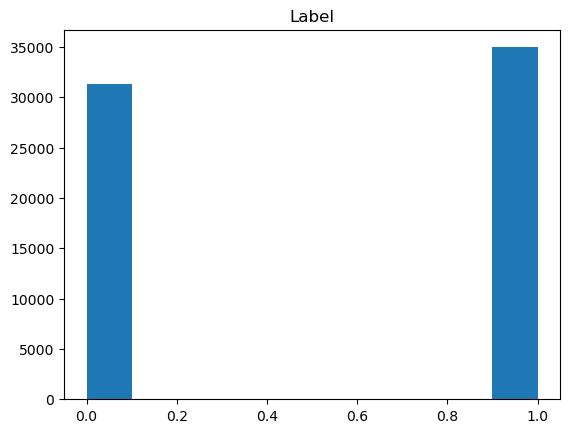

In [19]:
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

In [20]:
X= data_f.drop('Label', axis=1)
y= data_f['Label']
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.30, random_state=42)

In [21]:
print("The train dataset size=", X_train.shape)
print("The test dataset size=", X_test.shape)

The train dataset size= (46365, 78)
The test dataset size= (19871, 78)


In [28]:
rf_model= RandomForestClassifier(n_estimators= 50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred= rf_model.predict(X_test)

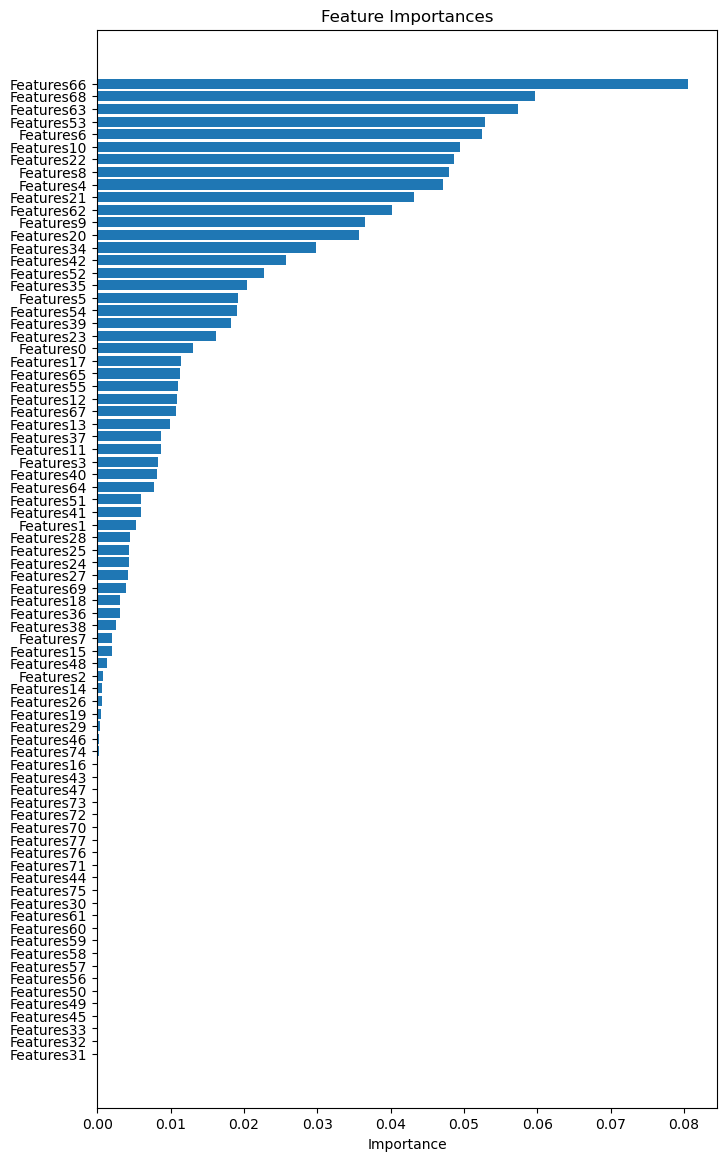

In [29]:
importances= rf_model.feature_importances_
indices= sorted(range(len(importances)), key= lambda i:importances[i], reverse= False)
feature_names= [f"Features{i}" for i in indices]

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

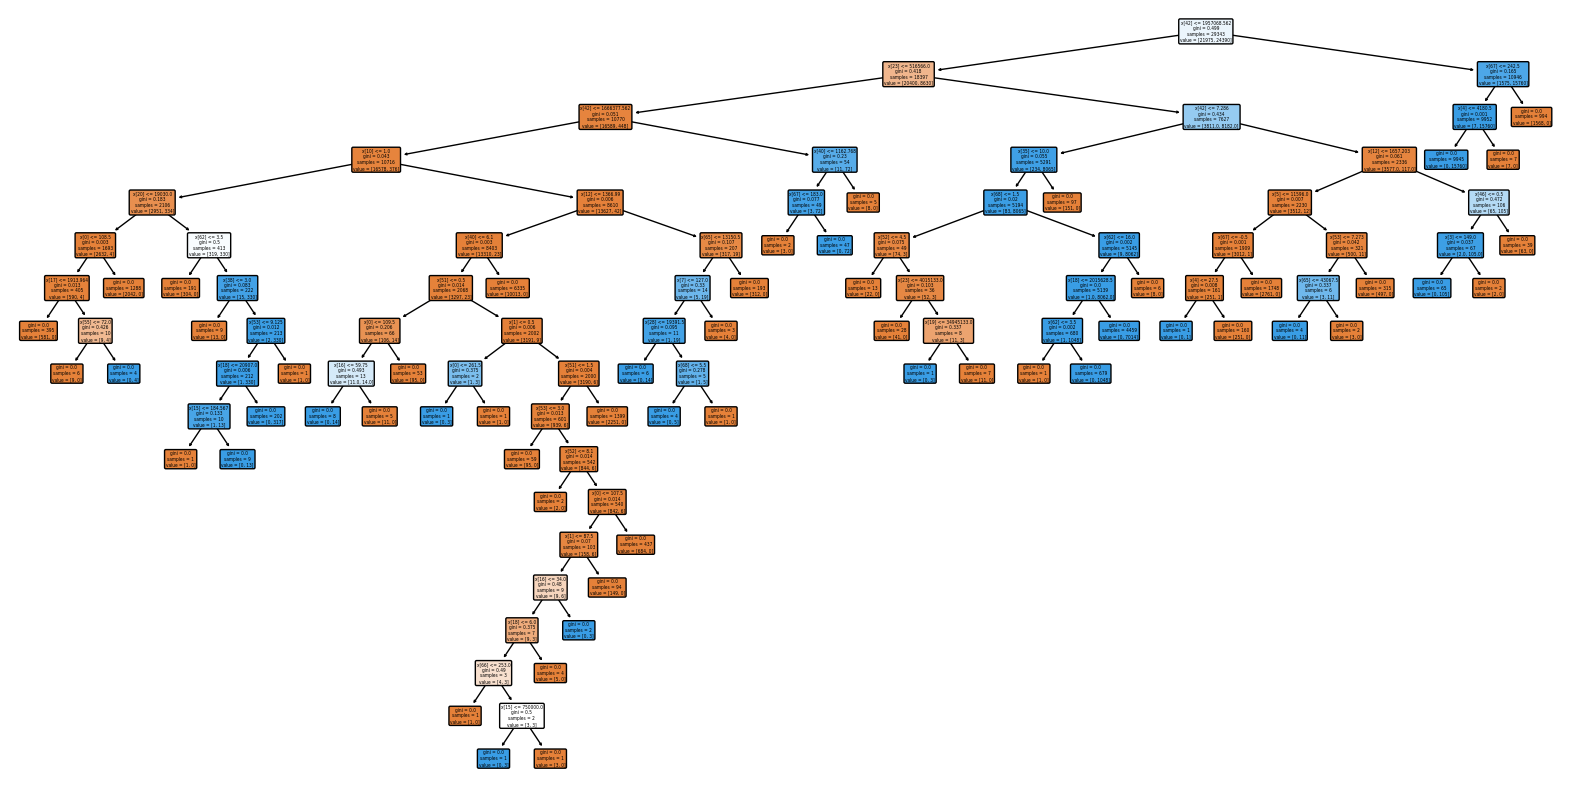

In [24]:
from sklearn.tree import plot_tree
estimator= rf_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, filled= True, rounded= True)
plt.show()

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm= confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt= 'd', cmap='Blues', xticklabels= classes, yticklabels= classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('true')
    plt.show()

In [32]:
rf_accuracy= accuracy_score(y_test, rf_pred)
rf_f1= f1_score(y_test, rf_pred)
rf_precision= recall_score(y_test, rf_pred)
rf_recall= recall_score(y_test, rf_pred)
print('\nRandom Forest metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest metrics:
Accuracy: 0.9995
F1 score: 0.9995
Precision: 0.9990
Recall: 0.9990


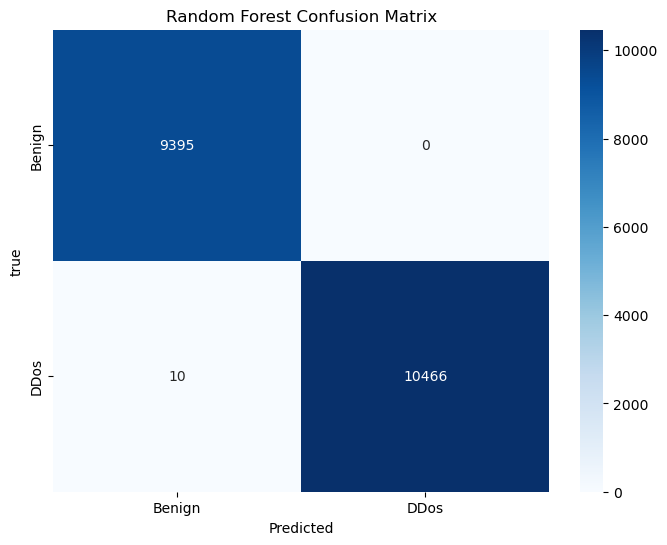

In [33]:
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDos'], 'Random Forest Confusion Matrix')

In [34]:
lr_model= LogisticRegression(random_state= 42)
lr_model.fit(X_train, y_train)
lr_pred= lr_model.predict(X_test)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
lr_accuracy= accuracy_score(y_test, lr_pred)
lr_f1= f1_score(y_test, lr_pred)
lr_precision= precision_score(y_test, lr_pred)
lr_recall= recall_score(y_test, lr_pred)

print('\nLogistic regression metrics:')
print(f'Accuracy:{lr_accuracy:.4f}')
print(f'F1 score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic regression metrics:
Accuracy:0.9448
F1 score: 0.9500
Precision: 0.9098
Recall: 0.9939


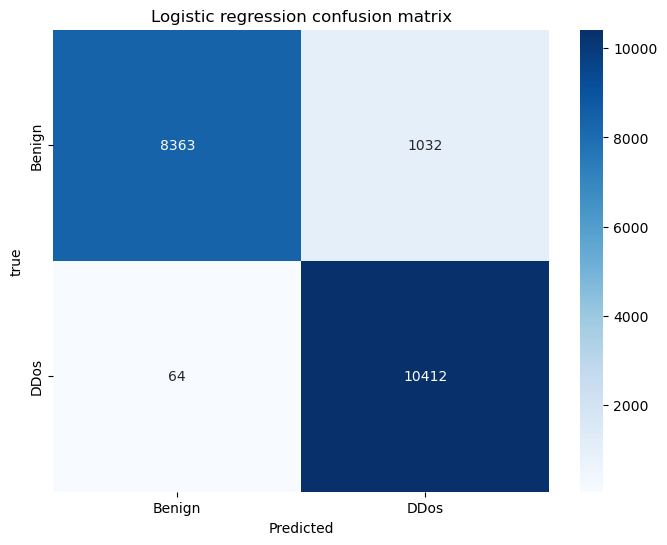

In [36]:
plot_confusion_matrix(y_test, lr_pred, ['Benign','DDos'], 'Logistic regression confusion matrix')

In [37]:
nn_model= MLPClassifier(hidden_layer_sizes=(10,), max_iter= 10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred= nn_model.predict(X_test)


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
nn_accuracy= accuracy_score(y_test, nn_pred)
nn_f1= f1_score(y_test, nn_pred)
nn_precision= precision_score(y_test, nn_pred)
nn_recall= recall_score(y_test, nn_pred)

print('\nNeural Networks metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'f1 score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Networks metrics:
Accuracy: 0.9850
f1 score: 0.9857
Precision: 0.9850
Recall: 0.9864


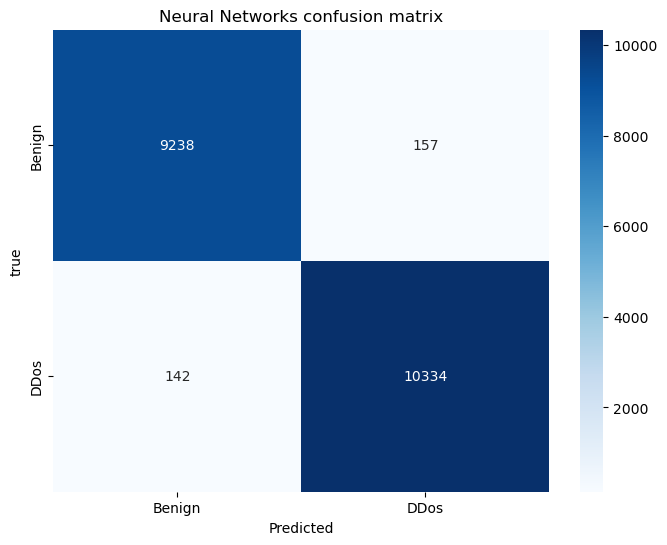

In [40]:
plot_confusion_matrix(y_test, nn_pred, ['Benign','DDos'], 'Neural Networks confusion matrix')

In [41]:
rf_proba= rf_model.predict_proba(X_test)
lr_proba= lr_model.predict_proba(X_test)
nn_proba= nn_model.predict_proba(X_test)

In [42]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


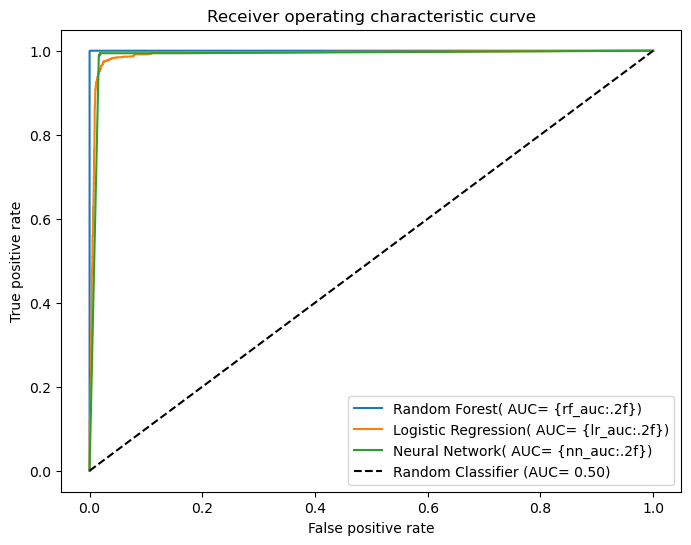

In [44]:
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label= 'Random Forest( AUC= {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label= 'Logistic Regression( AUC= {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label= 'Neural Network( AUC= {nn_auc:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color= 'black', label= 'Random Classifier (AUC= 0.50)')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.legend()
plt.show()